In [2]:
pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 49.8 MB/s eta 0:00:00


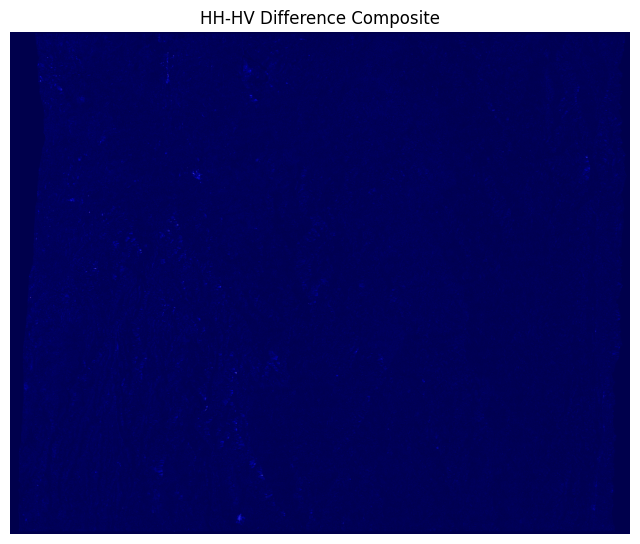

In [3]:


import rasterio
import numpy as np
import matplotlib.pyplot as plt

hh_tif_path = "/content/drive/MyDrive/DIP/DIP LAB DATA 1,3,5,6/HH-ALPSRP253690370-H2.2_UA.tif"
hv_tif_path = "/content/drive/MyDrive/DIP/DIP LAB DATA 1,3,5,6/HV-ALPSRP253690370-H2.2_UA.tif"


with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1)
    hv_data = hv_dataset.read(1)

hh_normalized = (hh_data - np.min(hh_data)) / (np.max(hh_data) - np.min(hh_data))
hv_normalized = (hv_data - np.min(hv_data)) / (np.max(hv_data) - np.min(hv_data))

difference = hh_normalized - hv_normalized


colormap = plt.get_cmap("seismic")
difference_colormap = (colormap(difference)[:, :, :3] * 255).astype(np.uint8)


plt.figure(figsize=(8, 8))
plt.imshow(difference_colormap)
plt.title("HH-HV Difference Composite")
plt.axis('off')

plt.show()


